CSC536: Data Viz. Fundamentals

SIT@KMUTT

2023

In [3]:
import pandas as pd 
import seaborn as sns  # think of sns as Seaborn NameSpace, or Sam Norman Seaborn, a ficitonal character in The West Wing drama show.
import numpy as np
import matplotlib.pyplot as plt

# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib 
# and integrates closely with pandas data structures

# Ref: https://seaborn.pydata.org/introduction.html
# Ref: Interactive data visualization with Python, Abha Belorkar et al., Packt Publishing, 2020

In [117]:
# Apply the default theme
sns.set_theme()  # the "darkgrid" theme will be used by default

# See all available datasets from Seaborn
availDat = sns.get_dataset_names()
for i in availDat:
  print(i)

# Let's look at the Tips dataset
tips = sns.load_dataset("tips")
tips.info()
print()
tips

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


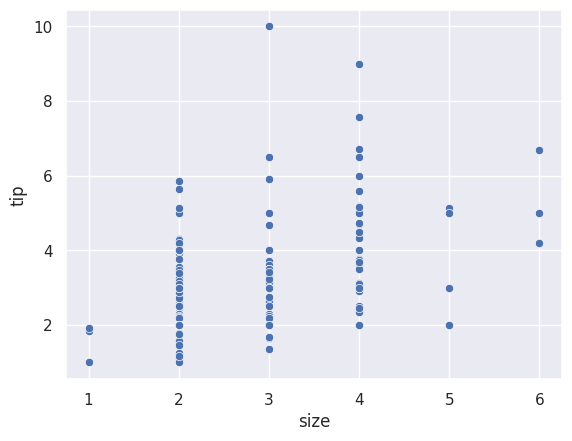

In [49]:

# A simple scatter plot
sns.scatterplot(data = tips, x='size', y='tip')
plt.show()

In [70]:
# Seaborn library provides five different built-in themes, namely,
# "darkgrid", "whitegrid", "dark", "white" and "ticks"

sns.set_style("whitegrid")
# sns.set_style("ticks")

# Or we can customize some styles
print(sns.axes_style())

custom = {"axes.edgecolor": 'magenta', "grid.linestyle": "dashed", "grid.color": "blue"}
sns.set_style("darkgrid", rc = custom)  # use with the rc function


{'axes.facecolor': 'white', 'axes.edgecolor': '.8', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.round: 'round'>, 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


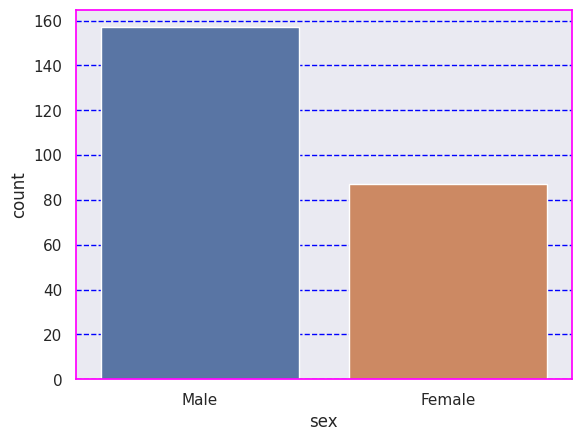

In [71]:
# A simple count plot
sns.countplot(data=tips, x='sex')
plt.show()

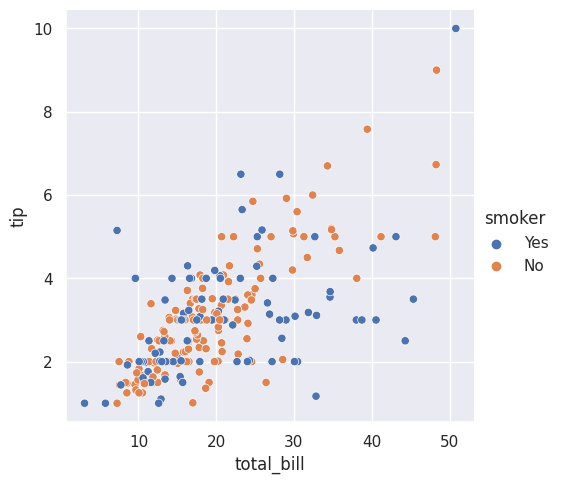

In [90]:
# Apply the default theme for a simple appearance
sns.set_theme()

# More handy plots

# Relational Plot (relplot) allows us to visualise how variables within a dataset relate to each other.
# This function provides access to several different axes-level functions that show the 
# relationship between two variables with semantic mappings of subsets.

# Assigning x, y, and any semantic mapping variables will draw a single plot.
# The 'kind' parameter selects the underlying axes-level function to use, e.g., line, scatter, etc.

sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", kind='scatter')  # kind='scatter' is by default


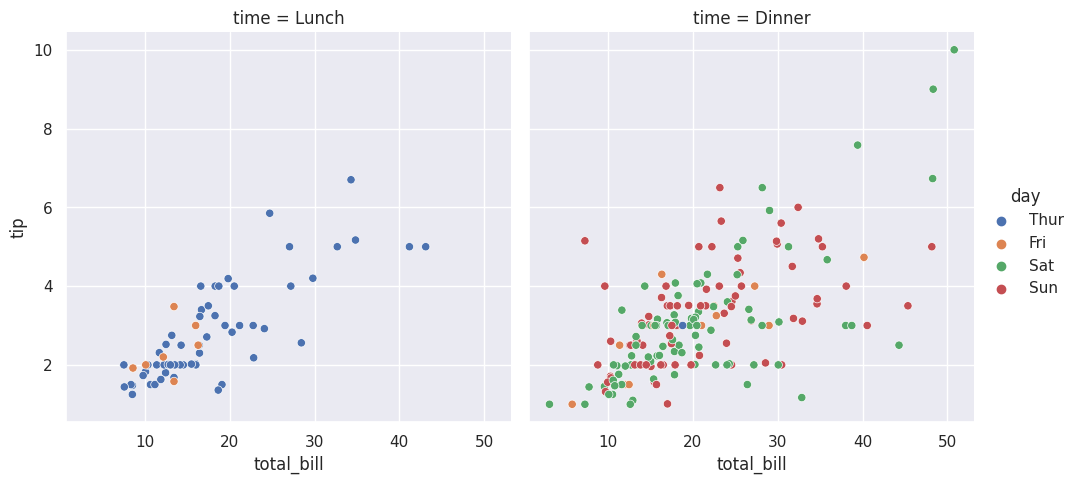

In [98]:
# Assigning a col variable creates a faceted figure with multiple subplots 
# arranged across the columns (col=) of the grid.

sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")  # columns-only grid or facet

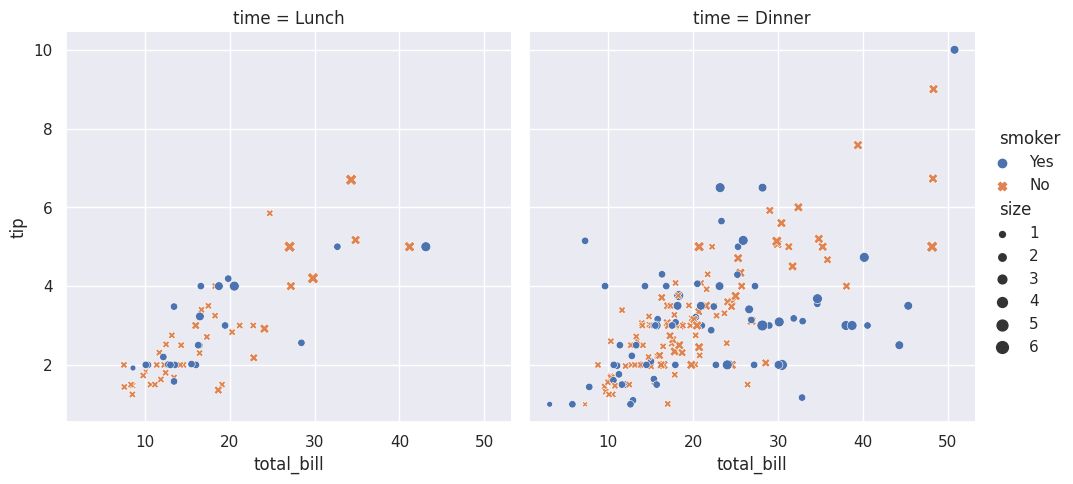

In [97]:
# another one with more options
# Using multiple semantic variables can show multi-dimensional relationships, 
# but be mindful to avoid making an overly-complicated plot.

sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",   # col is a column-wise facet/aspect/view.
    hue="smoker", style="smoker", size="size",
)

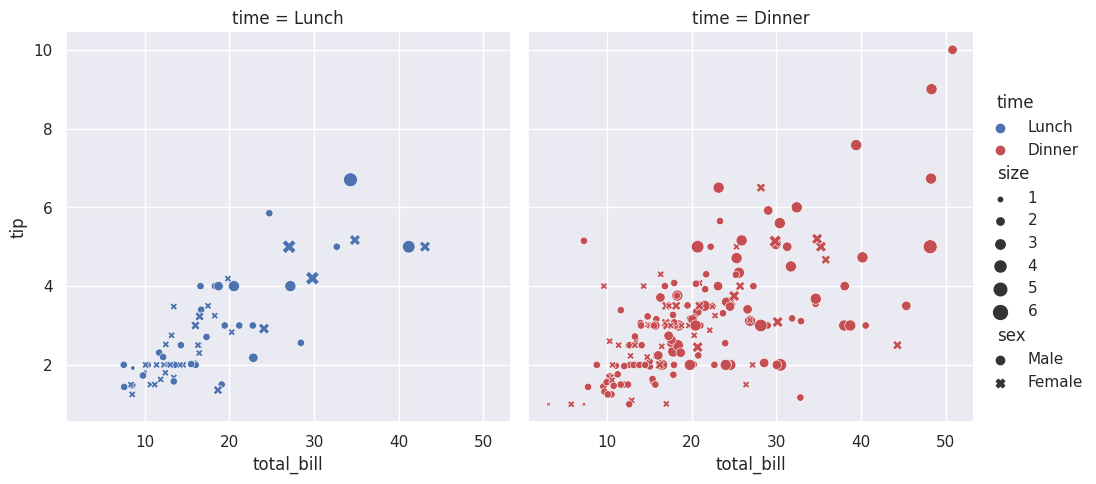

In [99]:
# Another one

# Using the hue, size, and style parameters to control what 
# visual semantics are used to identify the different subsets, but
# it could become ineffective.

# So at times using redundant semantics (i.e. both hue and col for the same variable) 
# can be helpful for making graphics more accessible.

sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)  # adjust the range of sizes as needed.
)

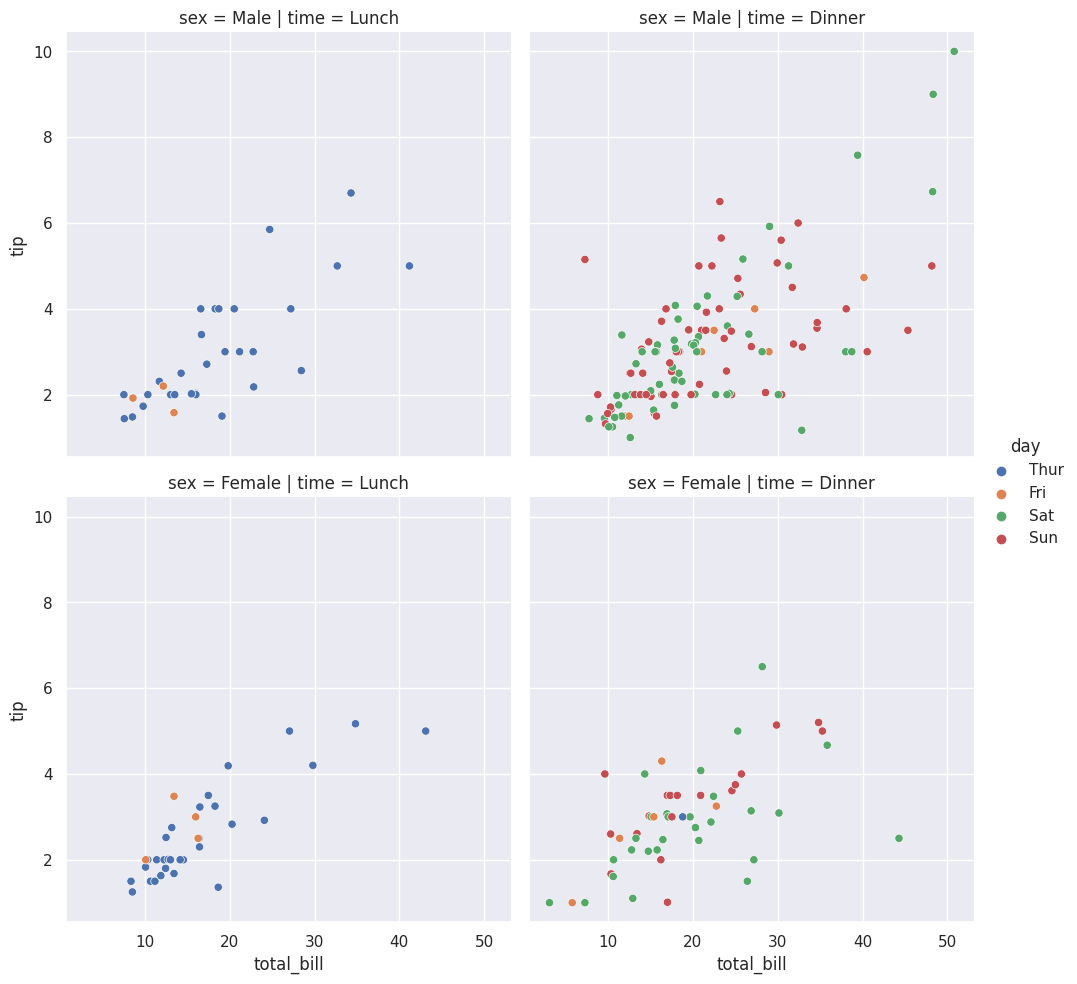

In [100]:
# Different variables can be assigned to facet on both the columns and rows

sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex") # rows-by-columns grid


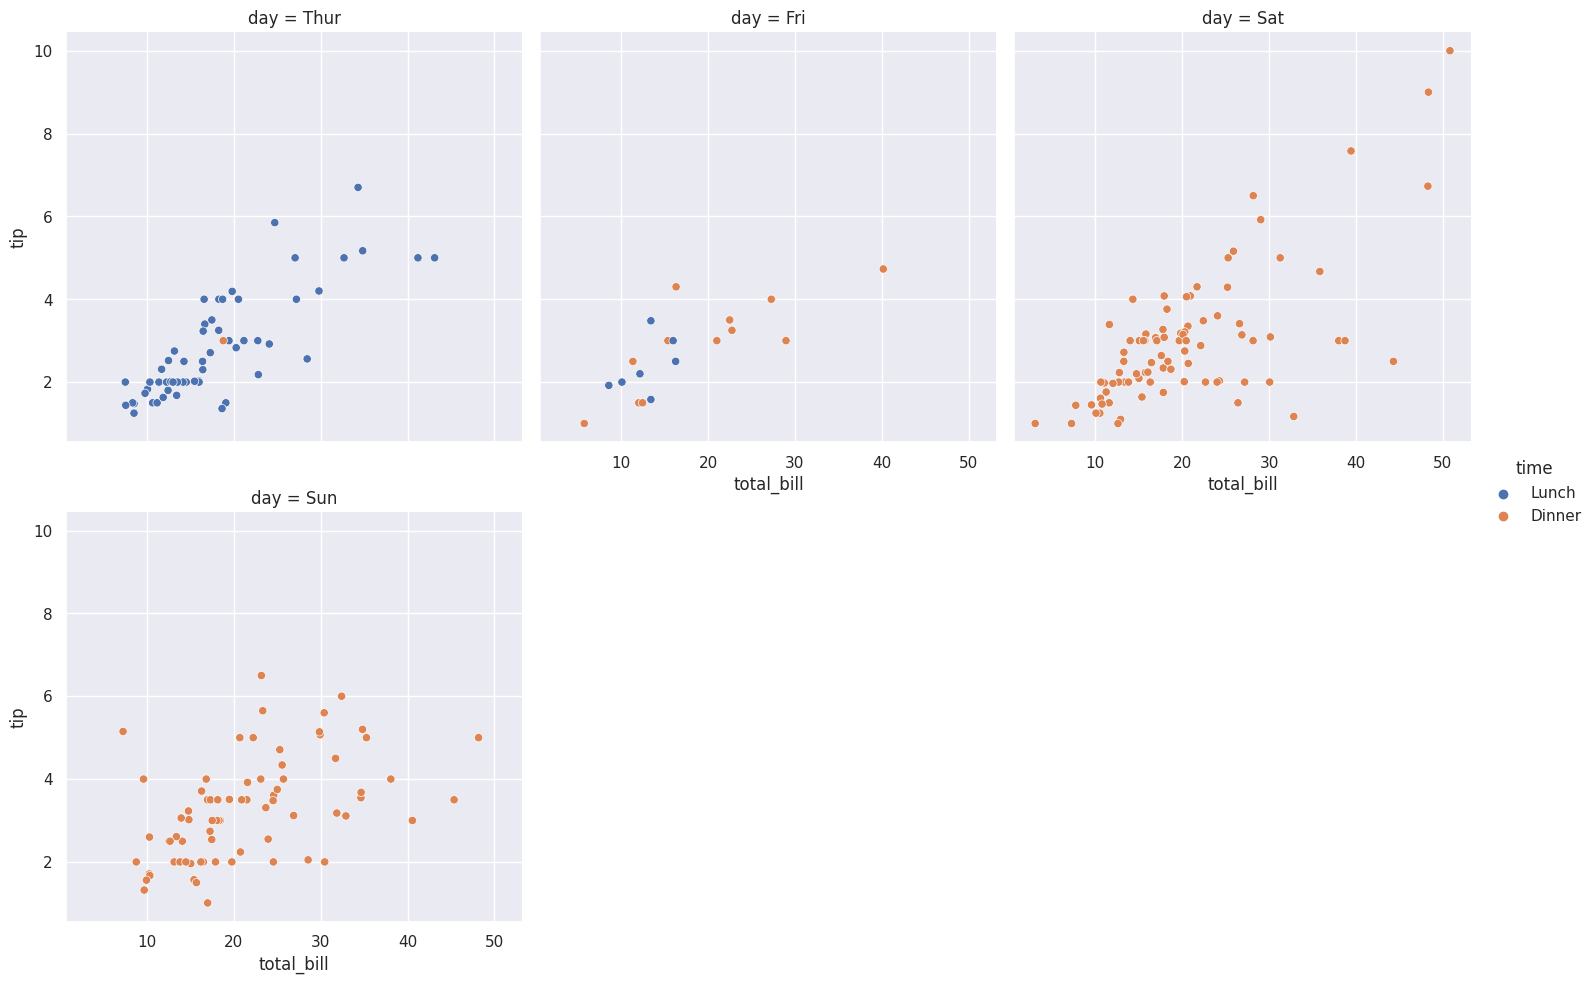

In [106]:
# When the variable assigned to col has many levels, it can be “wrapped” across multiple rows

sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=3)

In [107]:
# Check the column headers again

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


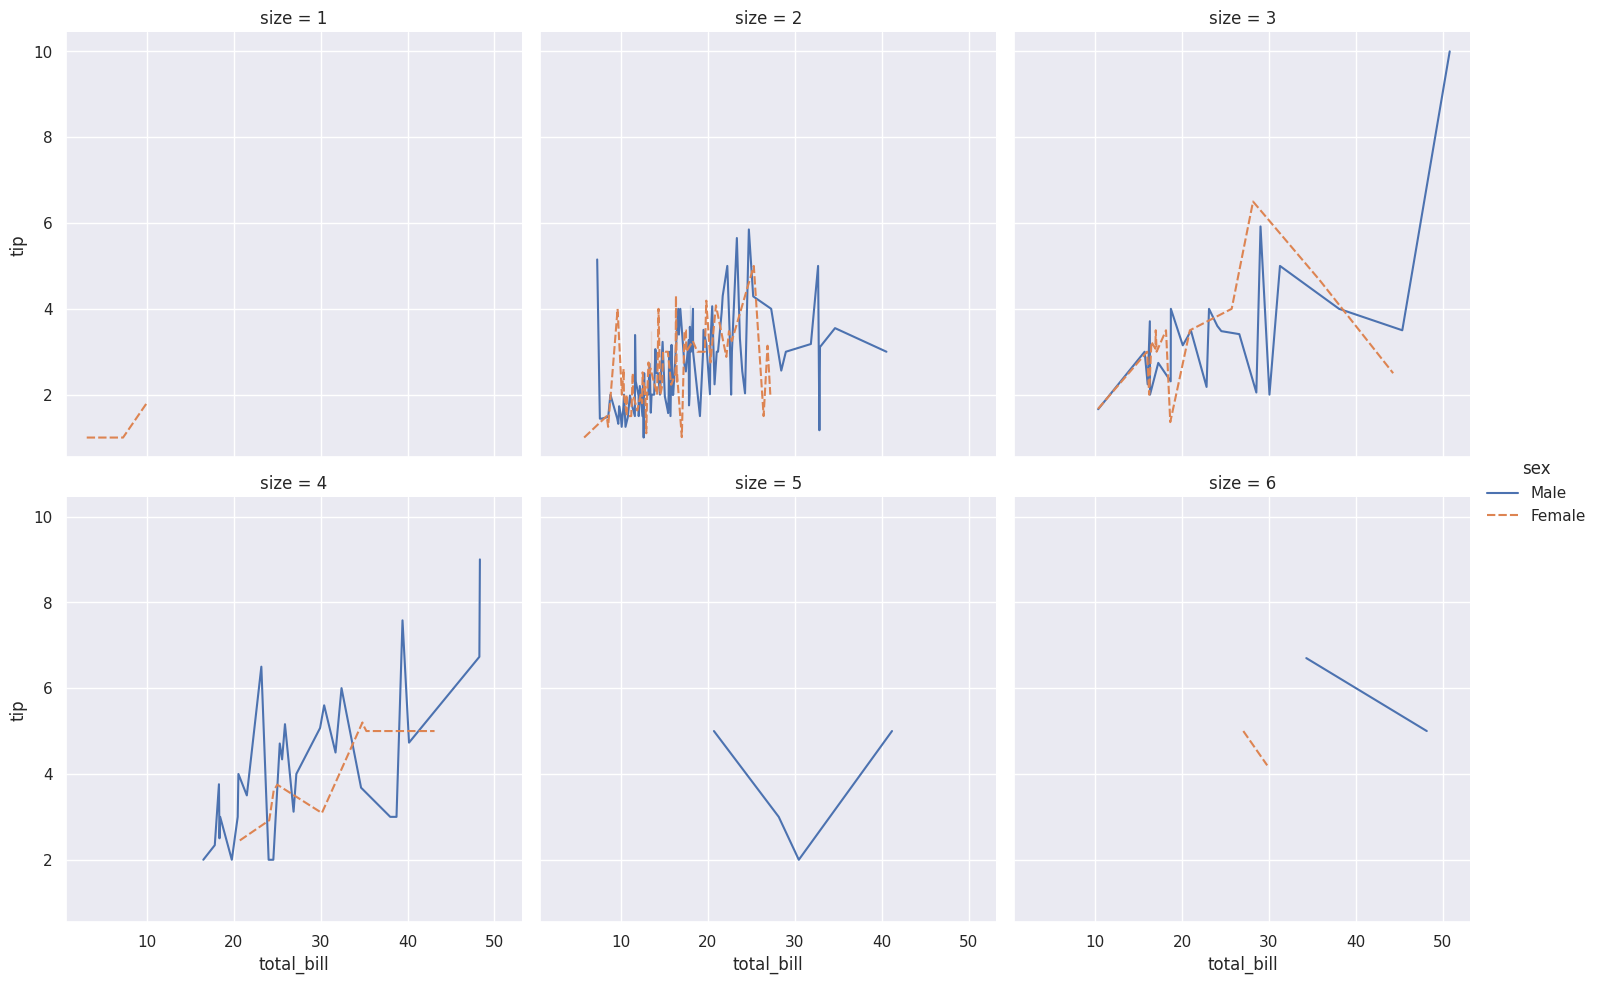

In [108]:
# Let's try to show lines instead of points
# set kind="line"

sns.relplot(
    data=tips, x="total_bill", y="tip", col="size", kind="line",
    hue="sex", style="sex", col_wrap=3)


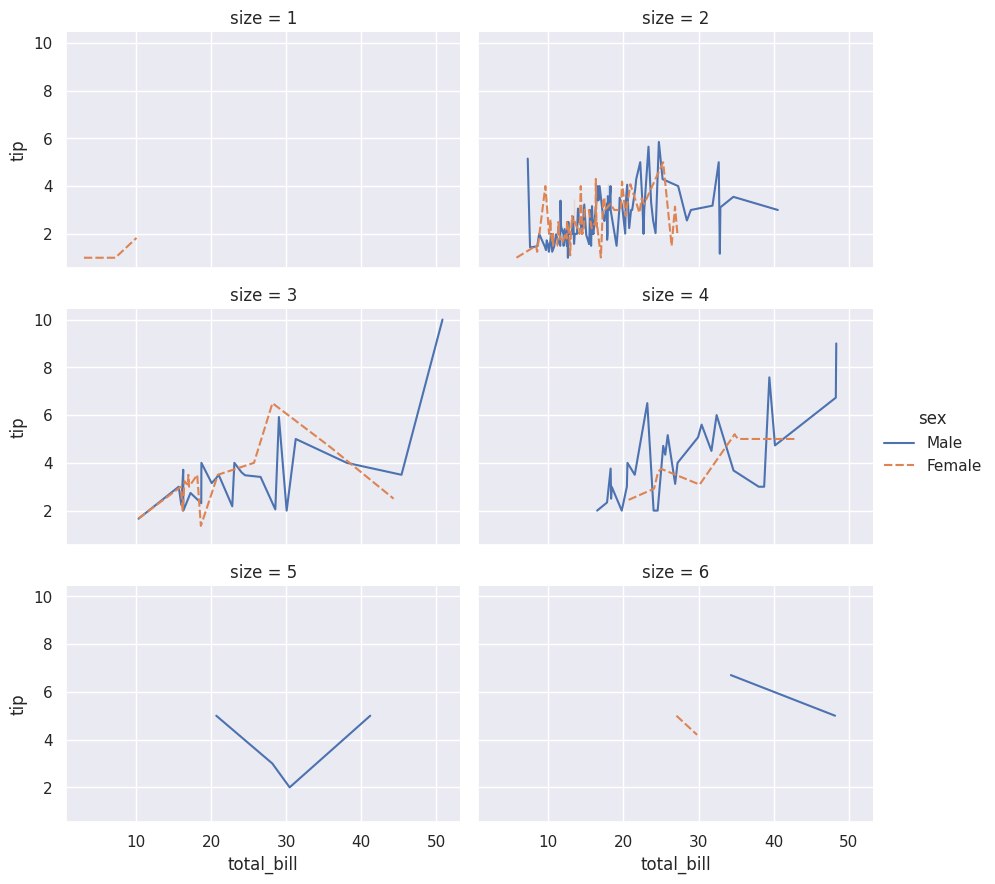

In [110]:

# The size and shape of the figure is parametrized by the height and aspect ratio of each individual facet.

sns.relplot(
    data=tips, x="total_bill", y="tip", col="size", kind="line", 
    hue="sex", style="sex", col_wrap=2, height=3, aspect=1.5)     # aspect * height = width


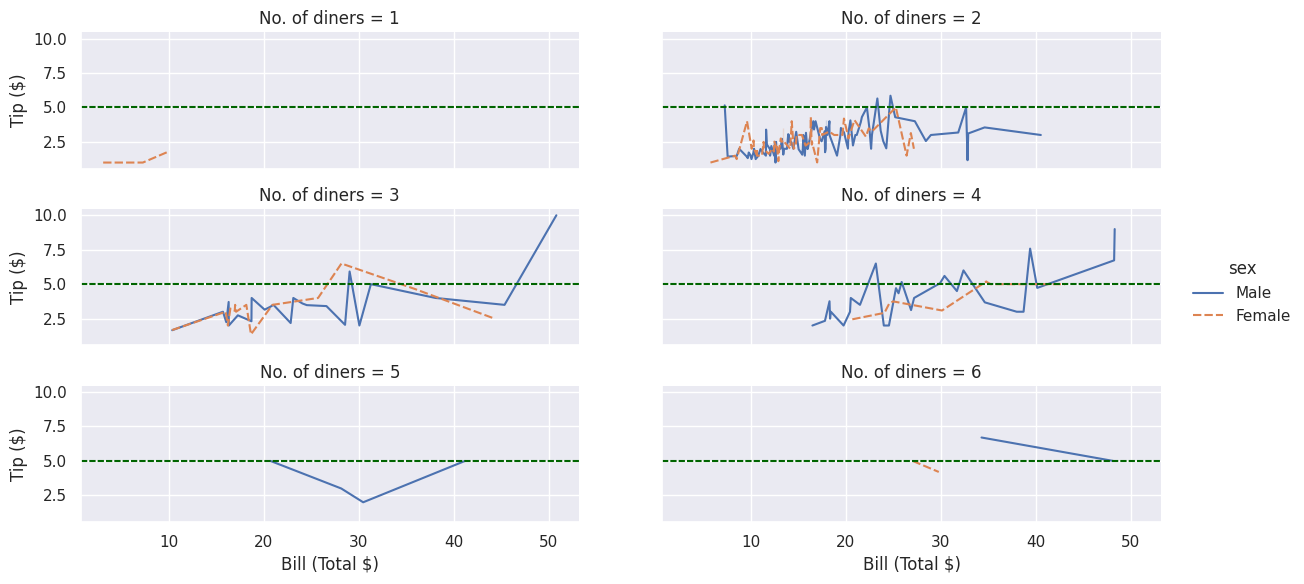

In [115]:
# The object returned by relplot() is always a FacetGrid, which has several methods 
# that allow you to quickly create the title, labels, and other aspects of the plot.

g = sns.relplot(
    data=tips, x="total_bill", y="tip", col="size", kind="line", 
    hue="sex", style="sex", col_wrap=2, height=2, aspect=3)

(g.map(plt.axhline, y=5, color="darkgreen", dashes=(3,1))   # add a horizontal line; dash describes a sequence of 3 point dashes separated by 1 point space
  .set_axis_labels("Bill (Total $)", "Tip ($)")
  .set_titles("No. of diners = {col_name}")  # col_name is the column name, mapped to the col variable
  .tight_layout(w_pad=5))


 Some more basic functionalities of the pandas DataFrame
 - think of this as a refresher section

In [118]:

# Try another dataset
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [126]:
# let's work on the Diamonds dataset

dm_df = sns.load_dataset('diamonds')
print(dm_df.shape)
print(dm_df.head())
print()
dm_df.info()


(53940, 10)
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non

In [129]:
# select some columns when loaded

dm_df = sns.load_dataset('diamonds', usecols=['carat','cut','color','clarity','price'])

In [128]:
dm_df

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757
53936,0.72,Good,D,SI1,2757
53937,0.70,Very Good,D,SI1,2757
53938,0.86,Premium,H,SI2,2757


In [131]:
# summarize some statistics of the columns whose values are numeric
dm_df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [133]:
# summary for categorical variables as well.
dm_df.describe(include= "all")    # all = all columns of the input will be included in the output.


,carat,cut,color,clarity,price
count,53940.000000,53940,53940,53940,53940.000000
unique,NaN,5,7,8,NaN
top,NaN,Ideal,G,SI1,NaN
freq,NaN,21551,11292,13065,NaN
mean,0.797940,NaN,NaN,NaN,3932.799722
std,0.474011,NaN,NaN,NaN,3989.439738
min,0.200000,NaN,NaN,NaN,326.000000
25%,0.400000,NaN,NaN,NaN,950.000000
50%,0.700000,NaN,NaN,NaN,2401.000000
75%,1.040000,NaN,NaN,NaN,5324.250000


In [134]:
print(dm_df['color'].unique)

<bound method Series.unique of 0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']>


In [135]:
# select some rows with specific color, G.
dm_df.loc[dm_df['color'] == 'G']

,carat,cut,color,clarity,price
25,0.23,Very Good,G,VVS2,354
51,0.23,Ideal,G,VS1,404
65,0.28,Ideal,G,VVS2,553
67,0.31,Very Good,G,SI1,553
68,0.31,Premium,G,SI1,553
...,...,...,...,...,...
53889,0.80,Ideal,G,SI2,2749
53894,0.71,Ideal,G,SI1,2751
53896,0.83,Ideal,G,SI2,2751
53913,0.80,Good,G,VS2,2753


In [136]:
# add some additional column of ours
dm_df['price_per_carat'] = dm_df['price']/dm_df['carat']
dm_df


,carat,cut,color,clarity,price,price_per_carat
0,0.23,Ideal,E,SI2,326,1417.391304
1,0.21,Premium,E,SI1,326,1552.380952
2,0.23,Good,E,VS1,327,1421.739130
3,0.29,Premium,I,VS2,334,1151.724138
4,0.31,Good,J,SI2,335,1080.645161
...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,3829.166667
53936,0.72,Good,D,SI1,2757,3829.166667
53937,0.70,Very Good,D,SI1,2757,3938.571429
53938,0.86,Premium,H,SI2,2757,3205.813953


In [139]:
# do some conditional operation on pricing
dm_df['price_per_carat_is_high'] = np.where(dm_df['price_per_carat']>3000,
                                            "Hi","Low")  # return a value Hi/Low, depending on the condition.
dm_df

,carat,cut,color,clarity,price,price_per_carat,price_per_carat_is_high
0,0.23,Ideal,E,SI2,326,1417.391304,Low
1,0.21,Premium,E,SI1,326,1552.380952,Low
2,0.23,Good,E,VS1,327,1421.739130,Low
3,0.29,Premium,I,VS2,334,1151.724138,Low
4,0.31,Good,J,SI2,335,1080.645161,Low
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,3829.166667,Hi
53936,0.72,Good,D,SI1,2757,3829.166667,Hi
53937,0.70,Very Good,D,SI1,2757,3938.571429,Hi
53938,0.86,Premium,H,SI2,2757,3205.813953,Hi


In [140]:
# perform some condition by applying a function on multiple columns

def is_wanted(x):
 bool_var = 'yes' if (x['cut']=='Ideal' and x['color']=='D') else 'no'
 return bool_var

dm_df['is_wanted'] = dm_df.apply(is_wanted, axis=1)   # Apply a function to 1-D slices along the given axis.
dm_df

,carat,cut,color,clarity,price,price_per_carat,price_per_carat_is_high,is_wanted
0,0.23,Ideal,E,SI2,326,1417.391304,Low,no
1,0.21,Premium,E,SI1,326,1552.380952,Low,no
2,0.23,Good,E,VS1,327,1421.739130,Low,no
3,0.29,Premium,I,VS2,334,1151.724138,Low,no
4,0.31,Good,J,SI2,335,1080.645161,Low,no
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,3829.166667,Hi,yes
53936,0.72,Good,D,SI1,2757,3829.166667,Hi,no
53937,0.70,Very Good,D,SI1,2757,3938.571429,Hi,no
53938,0.86,Premium,H,SI2,2757,3205.813953,Hi,no


In [142]:
# try to delete some columns

new_df = dm_df.drop(columns=['clarity', 'price_per_carat'])  # the original dataframe is not modified
new_df

,carat,cut,color,price,price_per_carat_is_high,is_wanted
0,0.23,Ideal,E,326,Low,no
1,0.21,Premium,E,326,Low,no
2,0.23,Good,E,327,Low,no
3,0.29,Premium,I,334,Low,no
4,0.31,Good,J,335,Low,no
...,...,...,...,...,...,...
53935,0.72,Ideal,D,2757,Hi,yes
53936,0.72,Good,D,2757,Hi,no
53937,0.70,Very Good,D,2757,Hi,no
53938,0.86,Premium,H,2757,Hi,no


Now, try to work on the Diamonds dataset.
Look at the following resources:

- https://www.kaggle.com/datasets/shivam2503/diamonds


- https://medium.com/@deepak.engg.phd/pythons-seaborn-library-data-visualization-on-dataset-diamond-920c8d7b798b

